# EDA, Feature Elimination/Engineering, and Stat Testing

## The goals of this notebook are the following:
## 1.perform feature engineering/ feature elimination to prepare dataframe for modeling
## 2. perform exploratory data anaylsis to get more insight into data
## 3. Perform statistical testing to gain more insight into data

In [1]:
import pandas as pd #importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scs

In [2]:
df=pd.read_csv('Cleanpitcherdataset.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Age,#days,Lev,Tm,G,GS,W,L,...,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,Best_Pitch,95mph+
0,0,Tim Adleman,28,1438,MLB-NL,Cincinnati,13,13,4.0,4.0,...,0.442,0.326,0.233,0.140,0.507,0.354,4.61,0.279,FB,0
1,1,Chase Anderson,28,1441,MLB-NL,Milwaukee,31,30,9.0,11.0,...,0.423,0.298,0.279,0.172,0.462,0.366,4.50,0.311,SL,0
2,2,Cody Anderson,25,1441,MLB-AL,Cleveland,19,9,2.0,5.0,...,0.465,0.287,0.248,0.158,0.515,0.327,3.92,0.296,CH,0
3,3,Tyler Anderson,26,1444,MLB-NL,Colorado,19,19,5.0,6.0,...,0.418,0.346,0.236,0.242,0.476,0.282,3.96,0.291,FB,0
4,4,Matt Andriese,26,1439,MLB-AL,Tampa Bay,29,19,8.0,8.0,...,0.353,0.358,0.289,0.166,0.491,0.343,3.83,0.287,CH,0


In [5]:
df.drop(axis=1,labels=['Unnamed: 0'],inplace=True)

In [6]:
df.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'GS', 'W', 'L', 'IP',
       ...
       'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 'kwERA', 'TTO%',
       'Best_Pitch', '95mph+'],
      dtype='object', length=125)

In [7]:
for col in df.columns:
    if df[col].isna().any()==True: #confirming no null values
        print(col)
    else:
        pass

In [10]:
df['Best_Pitch'].value_counts(dropna=False)

SL    398
FB    309
CH    263
CB    228
Name: Best_Pitch, dtype: int64

# Feature Engineering

In [11]:
df['95mph+']=np.where(df['FBv']>=95,1,0) 
#added feature based on signifcant result from stat test, please 
#see data cleaning notebook for code

In [12]:
df.shape

(1198, 125)

In [13]:
df['95mph+'].value_counts(dropna=False)

0    1086
1     112
Name: 95mph+, dtype: int64

# Exploratory Data Analysis

In [14]:
df.columns.tolist()

['Name',
 'Age',
 '#days',
 'Lev',
 'Tm',
 'G',
 'GS',
 'W',
 'L',
 'IP',
 'H',
 'R',
 'ER',
 'BB',
 'SO',
 'HR',
 'HBP',
 'ERA',
 'AB',
 '2B',
 '3B',
 'IBB',
 'GDP',
 'SF',
 'SB',
 'CS',
 'PO',
 'BF',
 'Pit',
 'Str',
 'StL',
 'StS',
 'LD',
 'PU',
 'WHIP',
 'BAbip',
 'SO9',
 'Season',
 'WAR',
 'CG',
 'ShO',
 'BS',
 'TBF',
 'WP',
 'BK',
 'GB',
 'FB',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'AVG',
 'BABIP',
 'LOB%',
 'FIP',
 'LD%',
 'GB%',
 'IFFB%',
 'IFH%',
 'BUH%',
 'RAR',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'Clutch',
 'FB%',
 'FBv',
 'SL%',
 'SLv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'wFB',
 'wSL',
 'wCB',
 'wCH',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'HLD',
 'SD',
 'MD',
 'ERA-',
 'FIP-',
 'xFIP-',
 'K%',
 'BB%',
 'SIERA',
 'E-F',
 'Pace',
 'RA9-WAR',
 'BIP-Wins',
 'LOB-Wins',
 'FDP-Wins',
 'K-BB%',
 'Pull%

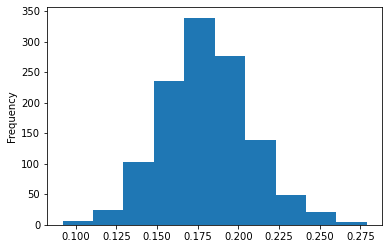

In [15]:
df['Soft%'].plot(kind='hist')

In [16]:
df['Soft%'].describe()

count    1198.000000
mean        0.180492
std         0.027353
min         0.092000
25%         0.162000
50%         0.180000
75%         0.198000
max         0.279000
Name: Soft%, dtype: float64

In [18]:
df['O-Swing%'].describe()

count    1198.000000
mean        0.304422
std         0.029950
min         0.210000
25%         0.284000
50%         0.304000
75%         0.323000
max         0.396000
Name: O-Swing%, dtype: float64

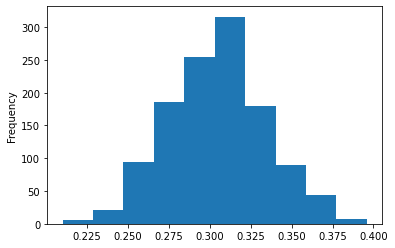

In [19]:
df['O-Swing%'].plot(kind='hist')

In [20]:
df.SO.corr(df['O-Swing%'])

0.3643129349886812

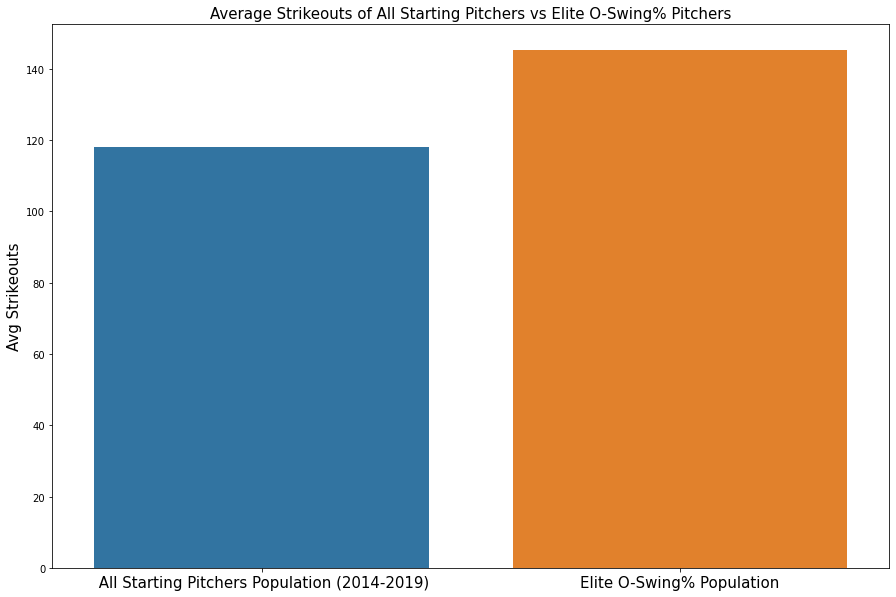

In [30]:
High_O=df.loc[(df['O-Swing%']>=.325),'SO'].mean()
Low_O=df['SO'].mean()
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(x=[' All Starting Pitchers Population (2014-2019)','Elite O-Swing% Population'],y=[Low_O,High_O],ax=ax)
ax.set_ylabel('Avg Strikeouts',fontsize=15)
ax.set_title('Average Strikeouts of All Starting Pitchers vs Elite O-Swing% Pitchers',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=15)

# Statistical Test
## 1 Sample Population mean test (two tail z-test)
### The goal of this test is to determine whether there is a statistically significant difference between average strikeouts of Pitcher who get swings outside the strike zone at an elite ratio compared to the average strikeouts of the general starting pitcher population .  Assuming alpha=.05 meaning .025 for each tail.

## Hypothesis
## Ho u_elite=u_gen_pop
## Ha u_elite≠u_gen_pop

In [38]:
u_gen_pop=df['SO'].mean()
print(u_gen_pop)
std_gen_pop=df['SO'].std()
print(std_gen_pop)

118.05258764607679
54.9237162708827


In [37]:
len_elite_sample=len(df.loc[(df['O-Swing%']>=.325),'SO'])
print(len_elite_sample)
u_elite=df.loc[(df['O-Swing%']>=.325),'SO'].mean()
u_elite

281


145.25978647686833

In [40]:
num=u_elite-u_gen_pop
denom=std_gen_pop/np.sqrt(len_elite_sample)
Test_stat=num/denom
Test_stat

8.303803727549939

In [113]:
P_val=(1-scs.norm.cdf(Test_stat))/2
P_val                   #will give area at tails

0.0

# The calculated p value is approximatly  0 (python estimated to zero since value is very small)which is much smaller then our threshold of .025 in each tail. Thus, we can reject the null hypothesis and therby show there is a significant differnce between Elite O-Swing % Pitchers and the general starting pitcher population.

In [43]:
df['O-Swing%_Elite']=np.where(df['O-Swing%']>=.325,1,0)

In [44]:
df['O-Swing%_Elite'].value_counts(dropna=False)

0    917
1    281
Name: O-Swing%_Elite, dtype: int64

In [45]:
df.shape

(1198, 126)

In [46]:
df.dtypes

Name               object
Age                 int64
#days               int64
Lev                object
Tm                 object
                   ...   
kwERA             float64
TTO%              float64
Best_Pitch         object
95mph+              int64
O-Swing%_Elite      int64
Length: 126, dtype: object

# Feature Elimination

In [72]:
bad_feats=['kwERA','SIERA',"WPA","+WPA",'exLI','inLI',"R",'SF',"CS",'BF','BS','Strikes','RS','BU','IFFB%','BUH%','tERA','REW','Clutch','HLD','MD','BIP-Wins','FDP-Wins','#days','W','L','WP','StS','StL','TBF']

In [73]:
len(bad_feats)

30

In [74]:
df.drop(axis=1,labels=bad_feats,inplace=True)

In [75]:
df.shape

(1198, 96)

In [90]:
df.drop(axis=1,labels=more_bad_feats,inplace=True)

In [92]:
df.shape

(1198, 76)

In [95]:
even_more_bad_feats=['FIP-','xFIP-','E-F','Pace','RA9-WAR','LOB-Wins','K-BB%','Pull%','Cent%','Oppo%','TTO%','SD','K%','BB%','ERA-','PO','SB']

In [96]:
df.drop(axis=1,labels=even_more_bad_feats,inplace=True)

In [97]:
df.shape

(1198, 59)

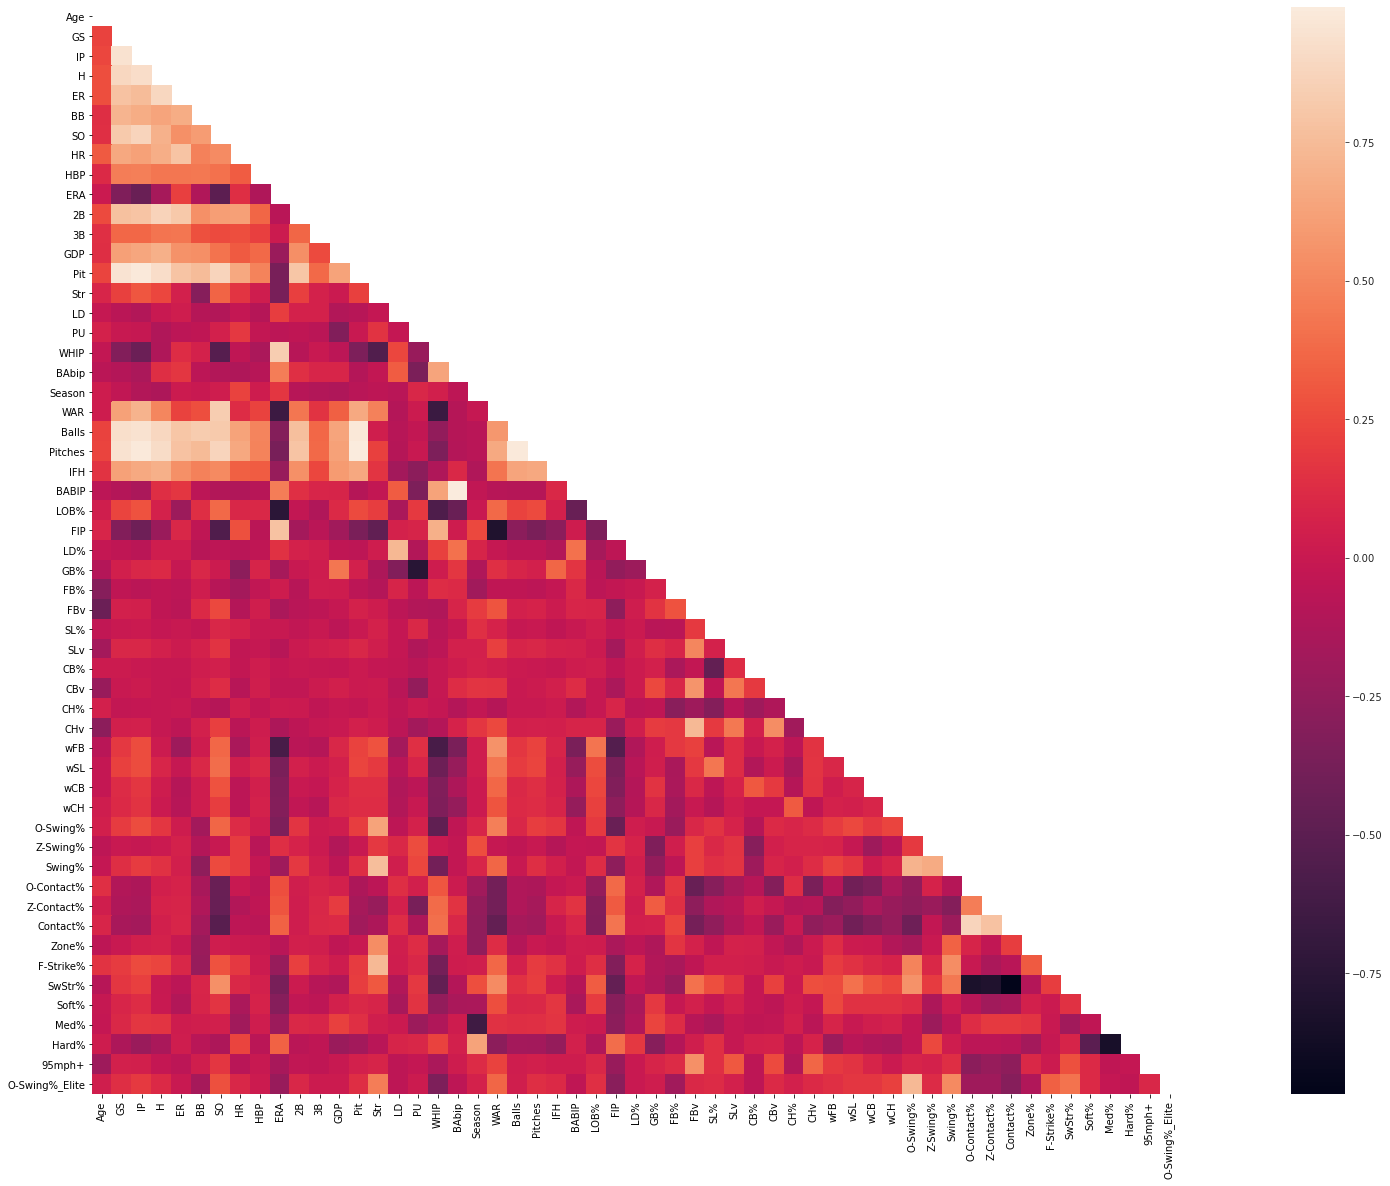

In [98]:
fig, ax = plt.subplots(figsize=(40, 20))
mask = np.zeros_like(df.corr()) #heat map of correlations
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)

In [104]:
final_cuts=['GDP','WHIP','IFH','ER',]

In [105]:
df.drop(axis=1,labels=final_cuts,inplace=True)

In [106]:
df.shape

(1198, 55)

In [107]:
df.to_csv('Cleanpitcherdataset.csv')

In [110]:
df.isna().any()

Name              False
Age               False
Lev               False
Tm                False
GS                False
IP                False
H                 False
BB                False
SO                False
HR                False
HBP               False
ERA               False
2B                False
3B                False
Pit               False
Str               False
LD                False
PU                False
BAbip             False
Season            False
WAR               False
Balls             False
Pitches           False
BABIP             False
LOB%              False
FIP               False
LD%               False
GB%               False
FB%               False
FBv               False
SL%               False
SLv               False
CB%               False
CBv               False
CH%               False
CHv               False
wFB               False
wSL               False
wCB               False
wCH               False
O-Swing%          False
Z-Swing%        

In [109]:
df.dtypes

Name               object
Age                 int64
Lev                object
Tm                 object
GS                  int64
IP                float64
H                   int64
BB                  int64
SO                  int64
HR                  int64
HBP                 int64
ERA               float64
2B                  int64
3B                  int64
Pit                 int64
Str               float64
LD                float64
PU                float64
BAbip             float64
Season              int64
WAR               float64
Balls             float64
Pitches           float64
BABIP             float64
LOB%              float64
FIP               float64
LD%               float64
GB%               float64
FB%               float64
FBv               float64
SL%               float64
SLv               float64
CB%               float64
CBv               float64
CH%               float64
CHv               float64
wFB               float64
wSL               float64
wCB         

In [114]:
df.shape

(1198, 55)

In [115]:
df['FStrike_elite'] = np.where(df['F-Strike%'] > .635,1,0)
df['Fstrikeelite_95mph+'] = df['FStrike_elite'] * df['95mph+']

In [117]:
df['Fstrikeelite_95mph+'].value_counts(dropna=False)

0    1165
1      33
Name: Fstrikeelite_95mph+, dtype: int64

In [119]:
df.shape

(1198, 57)

In [131]:
df = pd.concat([df, pd.get_dummies(df['Best_Pitch'],drop_first=True)], 1)

In [132]:
df.shape

(1198, 60)

In [133]:
df.to_csv('Cleanpitcherdataset.csv')